In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

In [37]:
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
#Import scikit-learn MLP classifier
from sklearn.neural_network import MLPClassifier 
from sklearn.preprocessing import StandardScaler


In [38]:
emcal_data_squeeze = np.load('emcal_data_squeeze.npy')
hcal_data_squeeze = np.load('hcal_data_squeeze.npy')
tracker_data_squeeze = np.load('tracker_data_squeeze.npy')
truth_data_squeeze = np.load('truth_data_squeeze.npy')

In [39]:
X=np.array(list(zip(emcal_data_squeeze, hcal_data_squeeze, tracker_data_squeeze))).reshape(1000,-1)
y=truth_data_squeeze

In [40]:
np.array(X).shape

(1000, 9408)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [42]:
# 数据标准化
scaler_X = StandardScaler()
scaler_Y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = scaler_Y.fit_transform(y_train)
y_test = scaler_Y.transform(y_test)


In [43]:
mlp = MLPRegressor(hidden_layer_sizes=(256, 128), activation='relu', solver='adam', max_iter=500)


In [44]:
model = mlp.fit(X_train, y_train)


In [45]:
y_pred = model.predict(X_test)

In [46]:
from sklearn.metrics import mean_squared_error
# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 1.0163


# 模型预测

Text(0.5, 1.0, 'Predicted Sample')

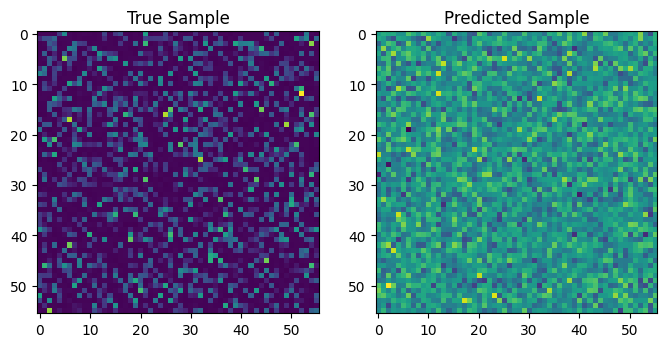

In [47]:
import skimage.io as io
idx = np.random.randint(0, y_pred.shape[0])

true_sample=y_test[idx].reshape(56,56)
pred_sample=y_pred[idx].reshape(56,56)


# 创建一个包含两个子图的图像窗口
fig, ax = plt.subplots(1, 2, figsize=(8, 4))



# 显示真实图像
ax[0].imshow(true_sample)
ax[0].set_title('True Sample')


# 显示预测图像
ax[1].imshow(pred_sample)
ax[1].set_title('Predicted Sample')
